In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
np.random.seed(7)


In [61]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### 1 Loading the cifer dataset
#### 2 Normalize the dataset to [0,1]
#### 3 Labels are Encoded for classification

In [62]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
y_test.shape[0]

10000

In [64]:
model = Sequential()
# convulotional layer with 32 layers, 3x3 Kernel and RelU activation function 
model.add(Conv2D(32, (3,3), input_shape = (32, 32, 3), activation= 'relu', kernel_regularizer= L2(0.001) ) )
# Pooling reduces spatial dimensions by a factor of 2
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout randomly drops 25% of the neurons during training
model.add(Dropout(0.25))

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Another Convolutional layer with 64 filter

In [65]:
# Second Layer
model.add(Conv2D(64,(3,3), activation= 'relu', kernel_regularizer= L2(0.001)))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

In [68]:
#  Flatten the layer from 2D output to 1D for fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer= L2(0.001)))
model.add(Dropout(0.5))


In [70]:
#  output layer has num_classes neurons(10 for cifar-10), with softmax activation for multiclass classification
# softmax activation function is used for multi-class classification, the softmax ensures that the output values are in the range [0,1] and their sum is 1.
num_classes = 10
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#### Training and Evaluation

In [71]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
782/782 - 70s - 90ms/step - accuracy: 0.2233 - loss: 2.1399 - val_accuracy: 0.2444 - val_loss: 1.9710
Epoch 2/10
782/782 - 44s - 56ms/step - accuracy: 0.2499 - loss: 1.9444 - val_accuracy: 0.2688 - val_loss: 1.8693
Epoch 3/10
782/782 - 40s - 51ms/step - accuracy: 0.2672 - loss: 1.8700 - val_accuracy: 0.2870 - val_loss: 1.8216
Epoch 4/10
782/782 - 42s - 54ms/step - accuracy: 0.2860 - loss: 1.8250 - val_accuracy: 0.2955 - val_loss: 1.7742
Epoch 5/10
782/782 - 44s - 56ms/step - accuracy: 0.3025 - loss: 1.7925 - val_accuracy: 0.3149 - val_loss: 1.7666
Epoch 6/10
782/782 - 41s - 53ms/step - accuracy: 0.3269 - loss: 1.7527 - val_accuracy: 0.3512 - val_loss: 1.7008
Epoch 7/10
782/782 - 40s - 51ms/step - accuracy: 0.3416 - loss: 1.7279 - val_accuracy: 0.3627 - val_loss: 1.6893
Epoch 8/10
782/782 - 40s - 51ms/step - accuracy: 0.3565 - loss: 1.7070 - val_accuracy: 0.3663 - val_loss: 1.6909
Epoch 9/10
782/782 - 39s - 50ms/step - accuracy: 0.3691 - loss: 1.6902 - val_accuracy: 0.3961 - 

In [17]:
score = model.evaluate(X_test, y_test, verbose= 0)
print(f"Test loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Test loss: 1.1698113679885864
Test Accuracy: 0.7098000049591064


In [11]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [12]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits= 5)
fold_no  = 1
for train_index, val_index in kf.split(X_train):
    print(f"Training fold {fold_no}....")
    x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(x_train_fold, y_train_fold, epochs = 3, batch_size = 32, verbose = 2)
    score =  model.evaluate(x_val_fold, y_val_fold, verbose = 0)
    print(f"Fold {fold_no} Test loss: {score[0]} /Test accuracy: {score[1]}")
    fold_no += 1

Training fold 1....
Epoch 1/3
1250/1250 - 57s - 46ms/step - accuracy: 0.6108 - loss: 1.4753
Epoch 2/3
1250/1250 - 46s - 37ms/step - accuracy: 0.6224 - loss: 1.4525
Epoch 3/3
1250/1250 - 46s - 37ms/step - accuracy: 0.6270 - loss: 1.4356
Fold 1 Test loss: 1.347603678703308 /Test accuracy: 0.6590999960899353
Training fold 2....
Epoch 1/3
1250/1250 - 46s - 37ms/step - accuracy: 0.6315 - loss: 1.4265
Epoch 2/3
1250/1250 - 45s - 36ms/step - accuracy: 0.6349 - loss: 1.4131
Epoch 3/3
1250/1250 - 84s - 67ms/step - accuracy: 0.6388 - loss: 1.4077
Fold 2 Test loss: 1.3211582899093628 /Test accuracy: 0.6635000109672546
Training fold 3....
Epoch 1/3
1250/1250 - 45s - 36ms/step - accuracy: 0.6362 - loss: 1.4218
Epoch 2/3
1250/1250 - 44s - 35ms/step - accuracy: 0.6381 - loss: 1.4120
Epoch 3/3
1250/1250 - 91s - 73ms/step - accuracy: 0.6424 - loss: 1.4088
Fold 3 Test loss: 1.2982795238494873 /Test accuracy: 0.6826000213623047
Training fold 4....
Epoch 1/3
1250/1250 - 49s - 39ms/step - accuracy: 0.6428 

In [13]:
model.fit(x_train_fold, y_train_fold, validation_data= (x_val_fold, y_val_fold), epochs=3, batch_size=64, verbose=2)
score = model.evaluate(x_val_fold, y_val_fold, verbose= 0)
print(f"Test loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Epoch 1/3
625/625 - 39s - 63ms/step - accuracy: 0.6816 - loss: 1.2605 - val_accuracy: 0.7184 - val_loss: 1.1360
Epoch 2/3
625/625 - 39s - 63ms/step - accuracy: 0.6831 - loss: 1.2291 - val_accuracy: 0.6994 - val_loss: 1.1772
Epoch 3/3
625/625 - 37s - 60ms/step - accuracy: 0.6819 - loss: 1.2329 - val_accuracy: 0.7208 - val_loss: 1.1515
Test loss: 1.1514813899993896
Test Accuracy: 0.72079998254776


In [40]:
predict = model.predict(x_val_fold[:10])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [24]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
from numpy import array
df = len(np.unique(y_train))
print(f" The number of classes: {df}")


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
 The number of classes: 10


In [32]:
class_names = ["airplane","automobile", "bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
true_labels = np.argmax(y_test[:10], axis=1)
true_labels
sample_images = X_test[:10]
true_label_names = [class_names[label] for label in true_labels]

In [80]:
# def plt_images(images, labels, predictions):
#     plt.figure(figsize= (15,10))
#     plt.subplot(2, 10, i + 1)
# def plt_images(images, labels, predictions , num_images = 20):
#     plt.figure(figsize=(15,6))
#     for i in range(0, num_images):
#         plt.subplot(2, num_images //2, i + 1)
#         plt.imshow(images[i], cmap= 'Blues')
#         plt.title(f"True: {np.argmax(labels[i])} \nPred: {np.argmax(predictions[i])}")
#         plt.axis('off')
#     plt.show()
# def plot_images(images, labels, predictions = None):
#     fig, axes = plt.subplots(1,10, figsize = (15,3))
#     axes = axes.flatten()
#     for i, ax in enumerate(axes):
#         ax.imshow(images[i])
#         if predictions is None:
#             ax.set_title(f"True: {labels[i]}")
#         else:
#             ax.set_title(f"True: {labels[i]}\nPred: {predictions[i]}")
#         ax.axis("off")
#         plt.tight_layout()
#         plt.show()

In [ ]:
# plot_images(images= sample_images, labels= true_label_names)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

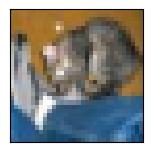

In [83]:
predictions = model.predict(test_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Function to plot predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label[0]]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

# Plot the first 15 test images, their predicted label, and the true label
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


In [77]:

def plot_images(images, labels, predictions):
    fig, axes = plt.subplots(1,10, figsize = (15,3))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        if predictions is None:
            ax.set_title(f"True: {labels[i]}")
        else:
            ax.set_title(f"True: {labels[i]}\nPred: {predictions[i]}")
        ax.axis("off")
        plt.tight_layout()
        plt.show()
predictions =model.predict(x_val_fold[:10])
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


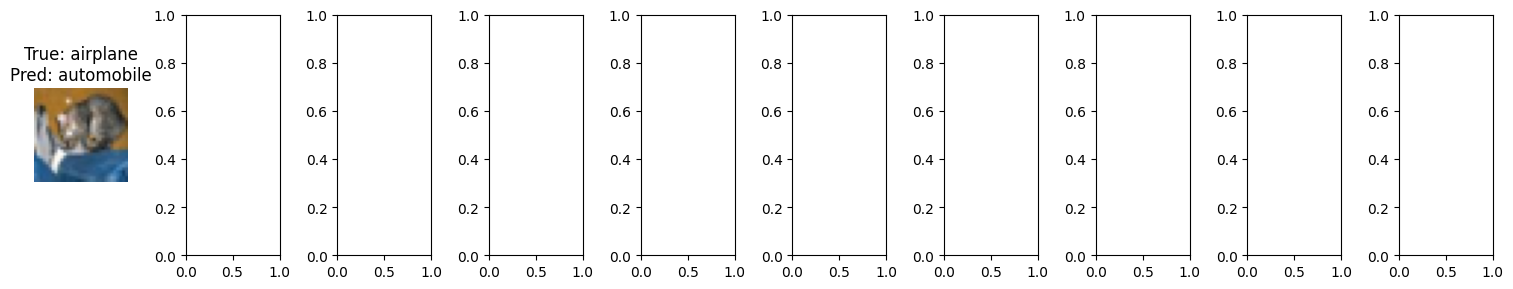

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [78]:
plot_images(sample_images, true_label_names, predicted_labels)

plt_images(sample_images, true)